# Цель лабораторной работы

Изучить различные методы визуализации данных.

## Задание

Требуется выполнить следующие действия:

- Выбрать набор данных (датасет).
- Создать ноутбук, который содержит следующие разделы:
    1. Текстовое описание выбранного набора данных.
    2. Основные характеристики датасета.
    3. Визуальное исследование датасета.
    4. Информация о корреляции признаков.
- Сформировать отчет и разместить его в своем репозитории на GitHub.

# Ход выполнение работы

## Текстовое описание набора данных

В качестве набора данных используется обзор показателей самоубийств с 1985 по 2016 год.
Этот скомпилированный набор данных взят из четырех других наборов данных, связанных по времени и месту, и был создан для поиска сигналов, связанных с повышенным уровнем самоубийств среди различных когорт во всем мире, а так же по всему социально-экономическому спектру.
Данный набор данных доступен по следующему адресу: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

Этот набор данных состоит из одного файла master.csv, содерждащего все данные датасета.
Данный файл содержит следующие колонки:

- country
- year
- sex
- age
- suicides_no
- population
- suicides/100k pop
- country-year
- HDI for year
- gdp_for_year
- gdp_per_capita
- generation

# Основные характеристики набора данных

Подключим все необходимые библиотеки:

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Загрузим непосредственно данные:

In [10]:
df = pd.read_csv('./master.csv')

Получим базовый обзор данных:

In [11]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Получим типы:

In [12]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

Получим размер датасета:

In [13]:
df.shape

(27820, 12)

Получим список колонок:

In [14]:
df.columns

Index([u'country', u'year', u'sex', u'age', u'suicides_no', u'population',
       u'suicides/100k pop', u'country-year', u'HDI for year',
       u' gdp_for_year ($) ', u'gdp_per_capita ($)', u'generation'],
      dtype='object')

Найдем все страны в наборе данных:

In [15]:
df_unique_country = df['country'].unique()
df_unique_country

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

Проверим основные статистические характеристики набора данных:

In [16]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


# Визуальное исследование датасета

Построим несколько графиков, чтобы изучить взаимосвязи между различными функциями набора данных.

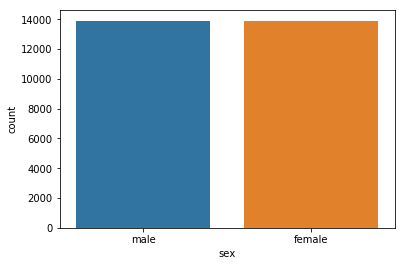

In [17]:
p = sns.countplot(x="sex", data=df)

Итак, из приведенного выше графика мы видим, что набор данных включает в себя одинаковое количество данных для обоих полов.

На приведенном ниже графике показаны корреляции между объектами в наборе данных.

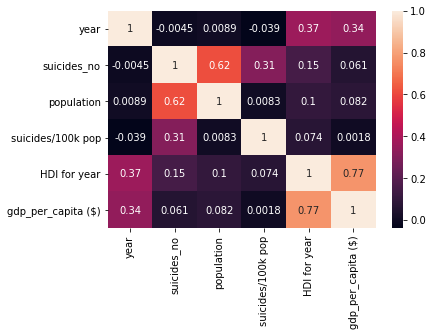

In [18]:
_ = sns.heatmap(df.corr(), annot=True)

На графике ниже показано количество самоубийств, совершенных людьми разных возрастных групп по обоим полам. Мы можем наблюдать, что уровень самоубийств выше в возрастной группе 35-54 лет как среди женского, так и мужского населения, и самый низкий в возрастной группе 5-14 лет.

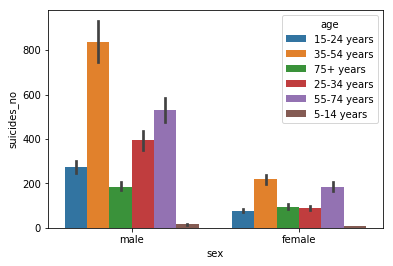

In [19]:
p = sns.barplot(x='sex', y='suicides_no', hue='age', data=df)

График ниже показывает количество самоубийств, совершенных людьми разных поколений по обоим полам. Здесь мы можем видеть, что число самоубийств выше в поколении Бумеров, тогда как оно является самым низким в поколении Z.

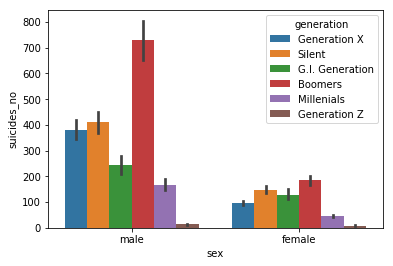

In [20]:
p = sns.barplot(x='sex', y='suicides_no', hue='generation', data=df)

На графике ниже показано количество самоубийств для мужчин и женщин разных возрастных групп за каждый год с 1985 по 2016 год.

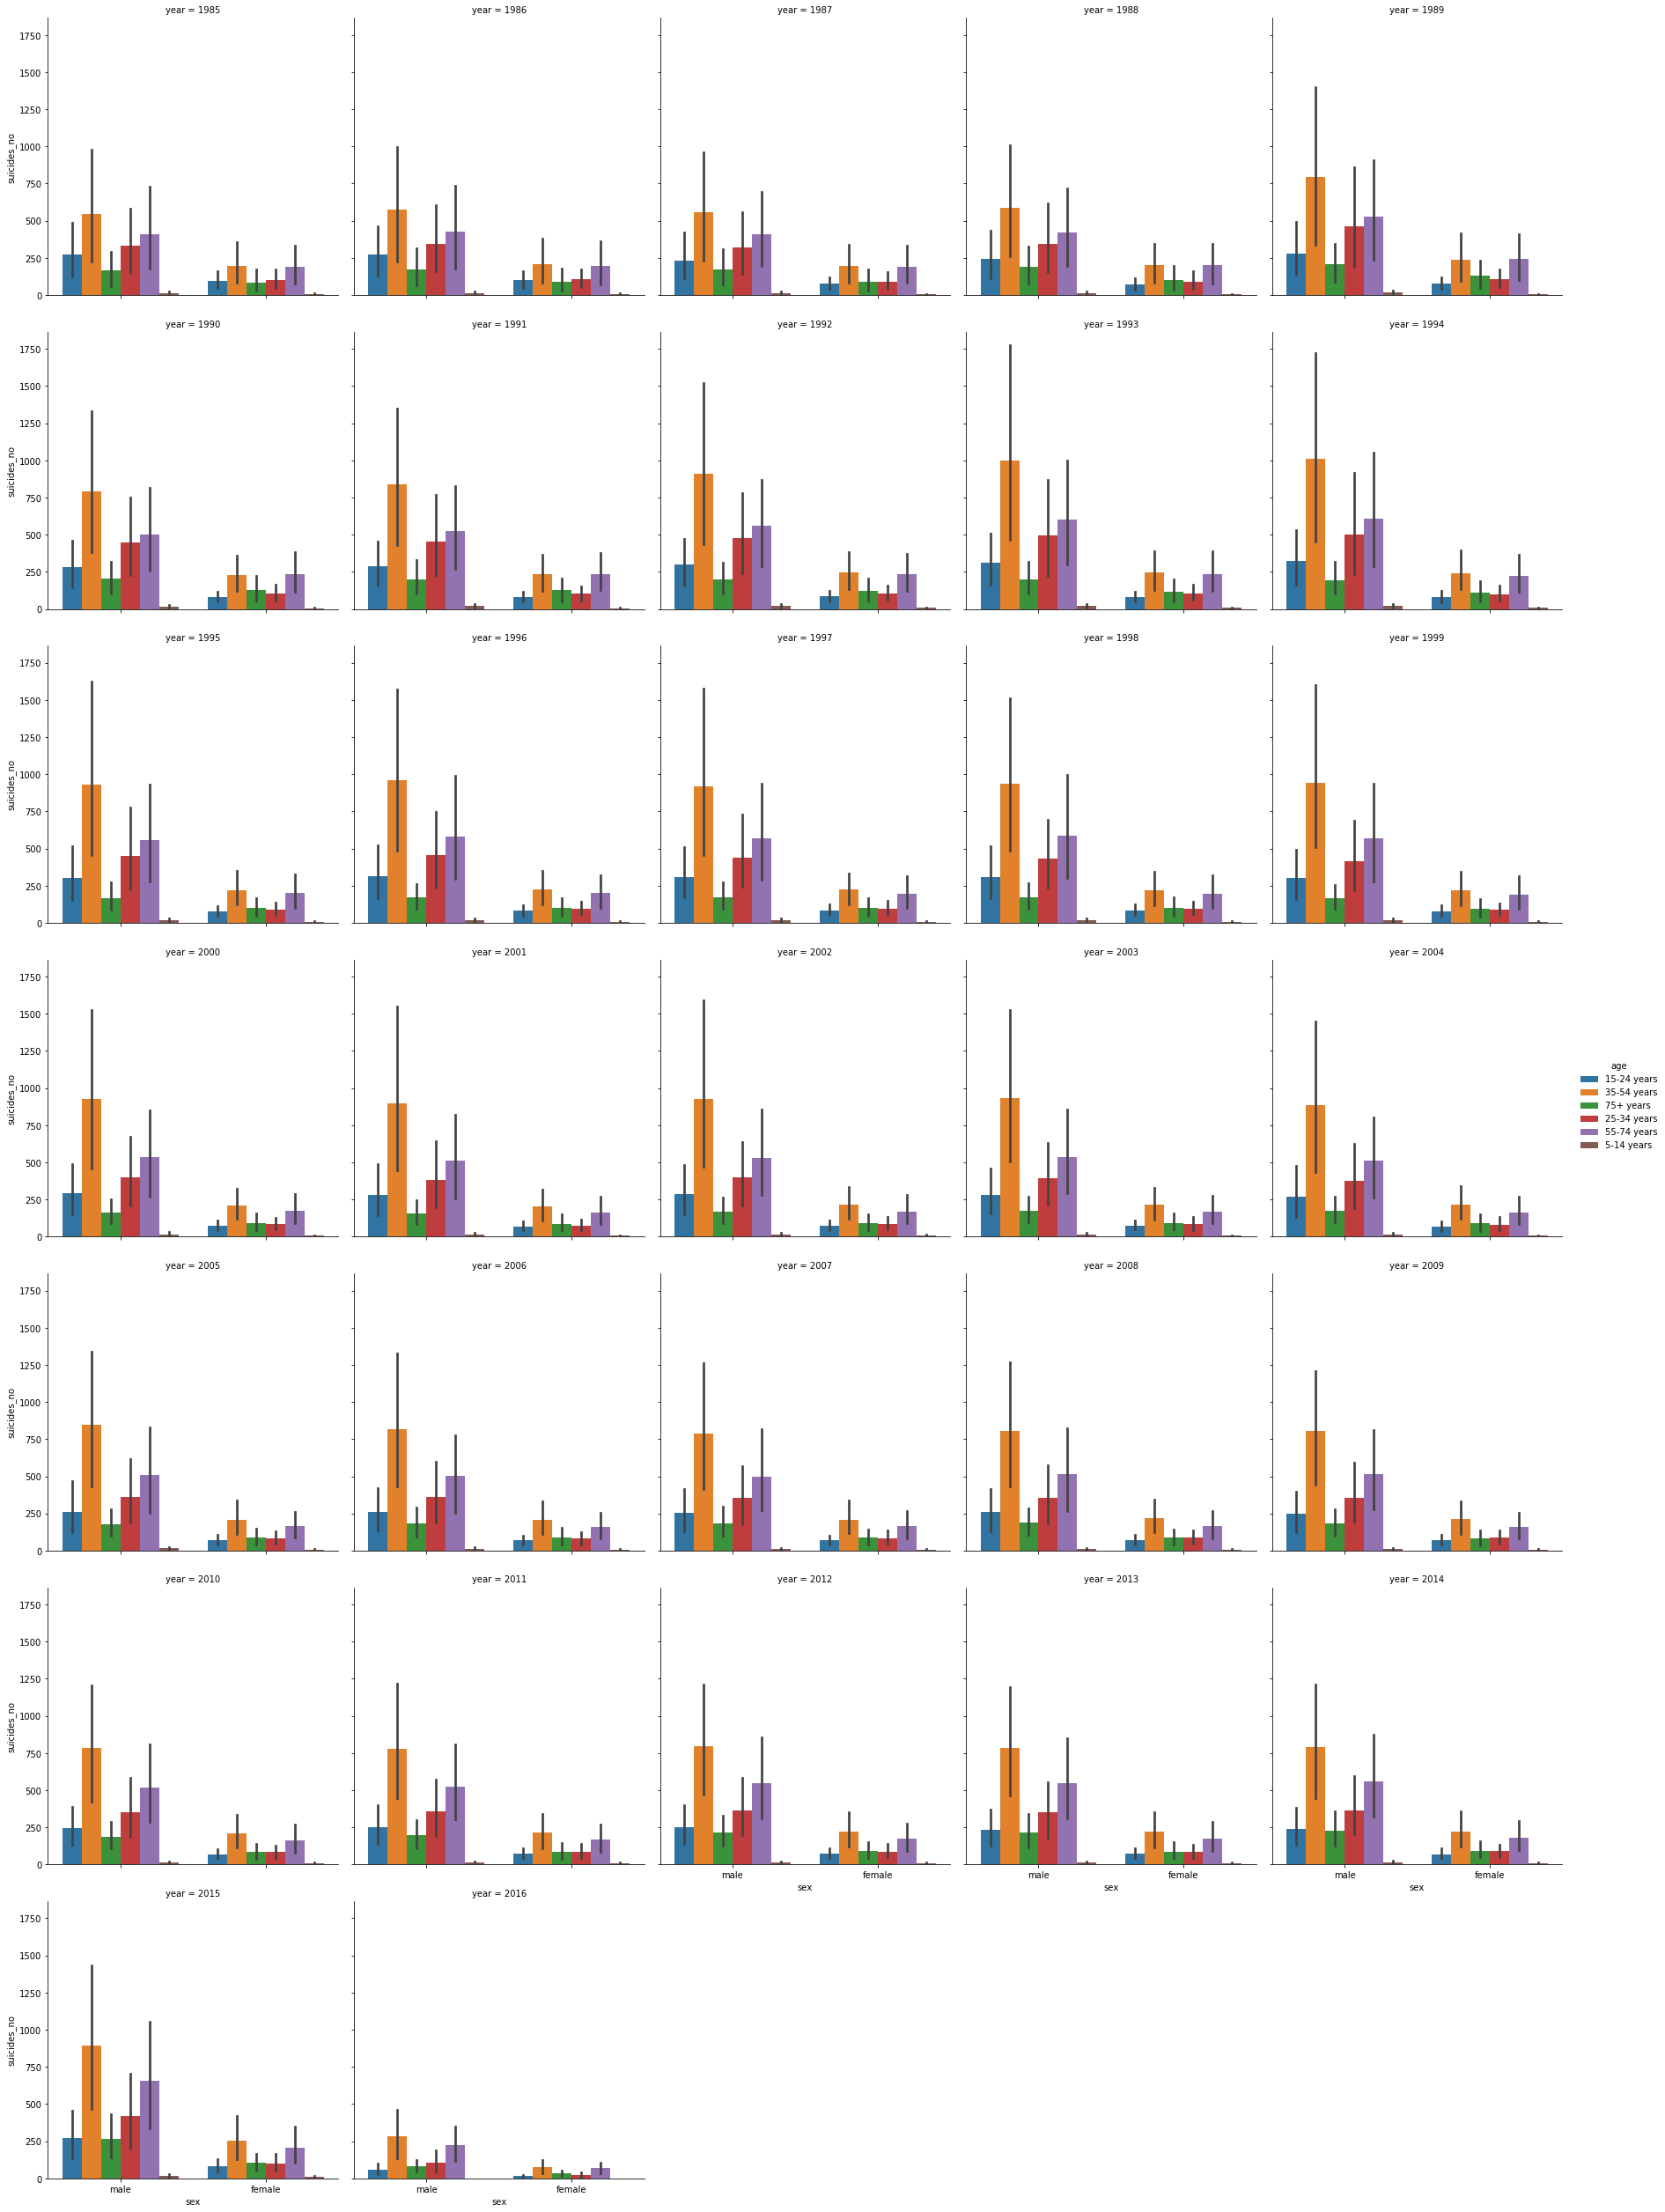

In [21]:
p = sns.catplot('sex','suicides_no',hue='age',col='year',data=df,kind='bar',col_wrap=5)

График выше показывает изменение числа самоубийств среди людей разных возрастных групп за каждый год.

In [22]:
age_15 = df.loc[df.loc[:, 'age']=='15-24 years',:]
age_35 = df.loc[df.loc[:, 'age']=='35-54 years',:]
age_75 = df.loc[df.loc[:, 'age']=='75+ years',:]
age_25 = df.loc[df.loc[:, 'age']=='25-34 years',:]
age_55 = df.loc[df.loc[:, 'age']=='55-74 years',:]
age_5 = df.loc[df.loc[:, 'age']=='5-14 years',:]

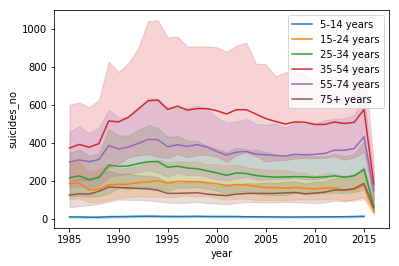

In [23]:
p = sns.lineplot(x='year', y='suicides_no', data=age_5)
q = sns.lineplot(x='year', y='suicides_no', data=age_15)
r = sns.lineplot(x='year', y='suicides_no', data=age_25)
s = sns.lineplot(x='year', y='suicides_no', data=age_35)
t = sns.lineplot(x='year', y='suicides_no', data=age_55)
t = sns.lineplot(x='year', y='suicides_no', data=age_75)

_ = plt.legend(['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'])

График ниже показывает изменение количества самоубийств среди мужчин и женщин за каждый год.

In [24]:
male_population = df.loc[df.loc[:, 'sex']=='male',:]
female_population = df.loc[df.loc[:, 'sex']=='female',:]

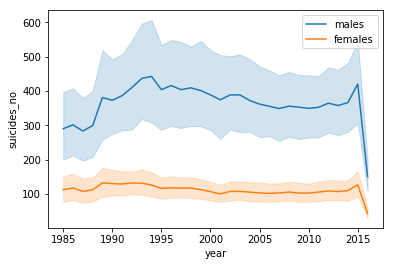

In [25]:
p = sns.lineplot(x='year', y='suicides_no', data=male_population)
q = sns.lineplot(x='year', y='suicides_no', data=female_population)

_ = plt.legend(['males', 'females'])

# Информация о корееляции признаков

Построим корреляционную матрицу по всему набору данных:

In [28]:
df.corr()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.151399,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.102943,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.074279,0.001785
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.771228
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.771228,1.000000


Визуализируем корреляционную матрицу с помощью тепловой карты:

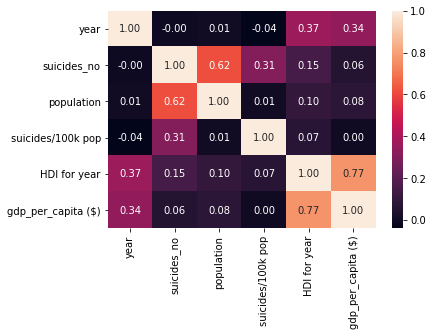

In [29]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");